# Lab 11

Convolutional neural networks (CNN)

Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,10)
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

C:\Users\samy\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Load MNIST dataset

In [2]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 35s 3us/step


Check backend (Tensorflow of Theano)

In [4]:
# input image dimensions
img_rows, img_cols = 28, 28

print('Keras backend: {}'.format(K.backend()))
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

Keras backend: tensorflow


Learning parameters

In [6]:
batch_size = 128
num_classes = 10
epochs = 12

Normilize data (Make values between 0 and 1) and print data shape

In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


Convert labels to matrix

In [8]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Model creation

In [10]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

Model compiling

In [11]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

Model training

In [12]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
 5120/60000 [=>............................] - ETA: 17:33 - loss: 1.0205 - acc: 0.6805

KeyboardInterrupt: 

Evaluate model

In [0]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Let's take a look on wrong classified data

In [0]:
predicted_classes = model.predict_classes(x_test)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == np.argmax(y_test,axis=1))[0]
incorrect_indices = np.nonzero(predicted_classes != np.argmax(y_test,axis=1))[0]

Plot correct classified data

In [0]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], np.argmax(y_test[correct])))

Plot correct classified data

In [0]:
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], np.argmax(y_test[incorrect])))

In [10]:
# Use scikit-learn to grid search the batch size and epochs
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

# Function to create model, required for KerasClassifier
def create_model():
	# create model
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3),activation='relu', input_shape=input_shape))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  # model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  # model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))

  # Compile model
  model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
  
  return model

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# create model
model = KerasClassifier(build_fn=create_model, verbose=0)

# define the grid search parameters
batch_size = [80, 100, 120, 140, 160, 180]
epochs = [10]
param_grid = dict(batch_size=batch_size, epochs=epochs)

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(x_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.988250 using {'batch_size': 80, 'epochs': 10}
0.988250 (0.000923) with: {'batch_size': 80, 'epochs': 10}
0.987850 (0.001535) with: {'batch_size': 100, 'epochs': 10}
0.987933 (0.001394) with: {'batch_size': 120, 'epochs': 10}
0.987400 (0.000512) with: {'batch_size': 140, 'epochs': 10}
0.987667 (0.001276) with: {'batch_size': 160, 'epochs': 10}
0.986483 (0.002106) with: {'batch_size': 180, 'epochs': 10}


In [0]:
x=[ parameter['batch_size'] for parameter in params]

<function matplotlib.pyplot.show>

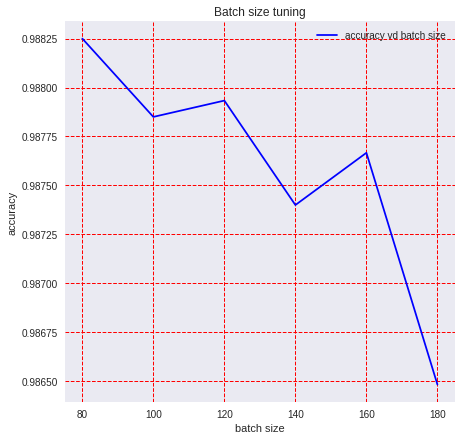

In [14]:
from matplotlib.pylab import rcParams

rcParams['figure.figsize']=7, 7
plt.figure()
plt.plot(x , means, color='blue', label='accuracy vs batch size')
plt.grid(color='r', linestyle='--', linewidth=1)
plt.xlabel("batch size")
plt.ylabel("accuracy")
plt.legend()
plt.title('Batch size tuning')
plt.show

In [15]:
# Use scikit-learn to grid search the batch size and epochs
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

# Function to create model, required for KerasClassifier
def create_model():
	# create model
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3),activation='relu', input_shape=input_shape))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  # model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  # model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))

  # Compile model
  model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
  
  return model

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# create model
model = KerasClassifier(build_fn=create_model, verbose=0)

# define the grid search parameters
batch_size = [80]
epochs = [10, 20, 30, 40, 50]
param_grid = dict(batch_size=batch_size, epochs=epochs)

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(x_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.989400 using {'batch_size': 80, 'epochs': 20}
0.988383 (0.000686) with: {'batch_size': 80, 'epochs': 10}
0.989400 (0.000990) with: {'batch_size': 80, 'epochs': 20}
0.989017 (0.000735) with: {'batch_size': 80, 'epochs': 30}
0.988633 (0.000953) with: {'batch_size': 80, 'epochs': 40}
0.988850 (0.001064) with: {'batch_size': 80, 'epochs': 50}


In [0]:
x=[ parameter['epochs'] for parameter in params]

<function matplotlib.pyplot.show>

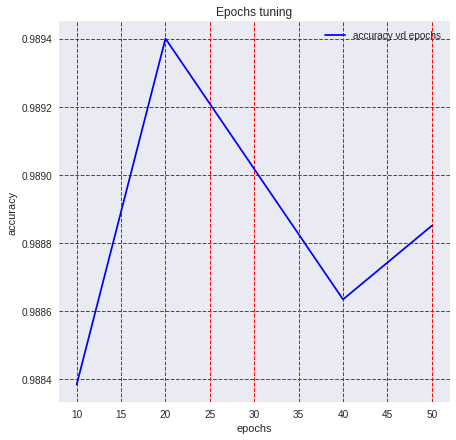

In [20]:
from matplotlib.pylab import rcParams

rcParams['figure.figsize']=7, 7
plt.figure()
plt.plot(x , means, color='blue', label='accuracy vs epochs')
plt.grid(color='r', linestyle='--', linewidth=1)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.title('Epochs tuning')
plt.show

In [21]:
# Use scikit-learn to grid search the batch size and epochs
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

# Function to create model, required for KerasClassifier
def create_model(optimizer='adam'):
	# create model
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3),activation='relu', input_shape=input_shape))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  # model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  # model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))

  # Compile model
  model.compile(loss=keras.losses.categorical_crossentropy, optimizer=optimizer, metrics=['accuracy'])
  
  return model

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# create model
model = KerasClassifier(build_fn=create_model, verbose=0)

# define the grid search parameters
batch_size = [80]
epochs = [20]

optimizer = ['SGD','Adam']

param_grid = dict(optimizer=optimizer, batch_size=batch_size, epochs=epochs)

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(x_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.988583 using {'batch_size': 80, 'epochs': 20, 'optimizer': 'Adam'}
0.975417 (0.000935) with: {'batch_size': 80, 'epochs': 20, 'optimizer': 'SGD'}
0.988583 (0.001124) with: {'batch_size': 80, 'epochs': 20, 'optimizer': 'Adam'}


In [0]:
x=[ parameter['optimizer'] for parameter in params]

No handles with labels found to put in legend.


<function matplotlib.pyplot.show>

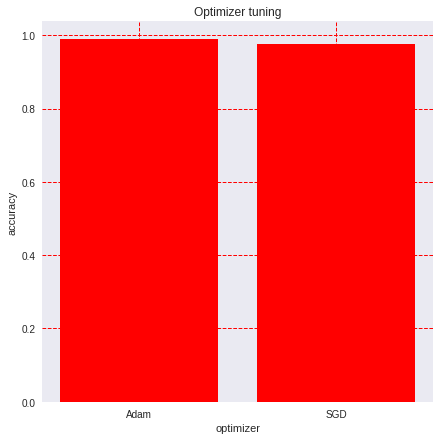

In [47]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=7, 7
plt.figure()

plt.bar( x, means, color='red')
plt.grid(color='r', linestyle='--', linewidth=1)
plt.xlabel("optimizer")
plt.ylabel("accuracy")
plt.legend()
plt.title('Optimizer tuning')
plt.show

In [49]:
# Use scikit-learn to grid search the batch size and epochs
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

# Function to create model, required for KerasClassifier
def create_model(neurons=128, optimizer='adam'):
	# create model
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3),activation='relu', input_shape=input_shape))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  # model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(neurons, activation='relu'))
  # model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))

  # Compile model
  model.compile(loss=keras.losses.categorical_crossentropy, optimizer=optimizer, metrics=['accuracy'])
  
  return model

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# create model
model = KerasClassifier(build_fn=create_model, verbose=0)

# define the grid search parameters
batch_size = [80]
epochs = [20]

optimizer = ['adam']
neurons=[64, 128, 256]

param_grid = dict(optimizer=optimizer, batch_size=batch_size, epochs=epochs, neurons=neurons)

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(x_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.986850 using {'batch_size': 80, 'epochs': 20, 'neurons': 128, 'optimizer': 'adam'}
0.986350 (0.001422) with: {'batch_size': 80, 'epochs': 20, 'neurons': 64, 'optimizer': 'adam'}
0.986850 (0.001208) with: {'batch_size': 80, 'epochs': 20, 'neurons': 128, 'optimizer': 'adam'}
0.985600 (0.003683) with: {'batch_size': 80, 'epochs': 20, 'neurons': 256, 'optimizer': 'adam'}


In [0]:
x=[ parameter['neurons'] for parameter in params]

<function matplotlib.pyplot.show>

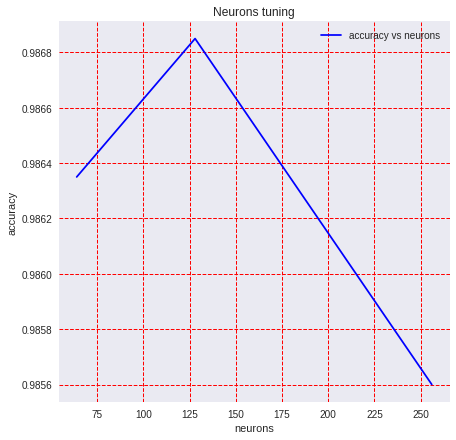

In [53]:
from matplotlib.pylab import rcParams

rcParams['figure.figsize']=7, 7
plt.figure()
plt.plot(x , means, color='blue', label='accuracy vs neurons')
plt.grid(color='r', linestyle='--', linewidth=1)
plt.xlabel("neurons")
plt.ylabel("accuracy")
plt.legend()
plt.title('Neurons tuning')
plt.show